In [34]:
import numpy as np
import matplotlib.pyplot as plt

In [35]:
import pandas as pd
adsdata = pd.read_csv('D:/data/others/advertising.csv')
adsdata.iloc[1:5, 0:]

,Unnamed: 0,TV,radio,newspaper,sales
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [36]:
# Remove the serial number column
adsdata = adsdata.iloc[0:,1:5]

In [37]:
adsdata.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [38]:
x1 = adsdata['TV']
x2 = adsdata['radio']
x3 = adsdata['newspaper']
y = adsdata['sales']

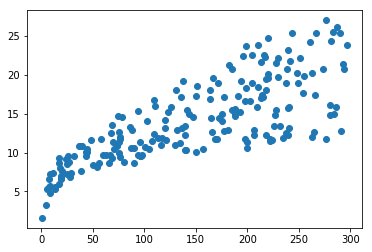

In [39]:
plt.scatter(x1, y)

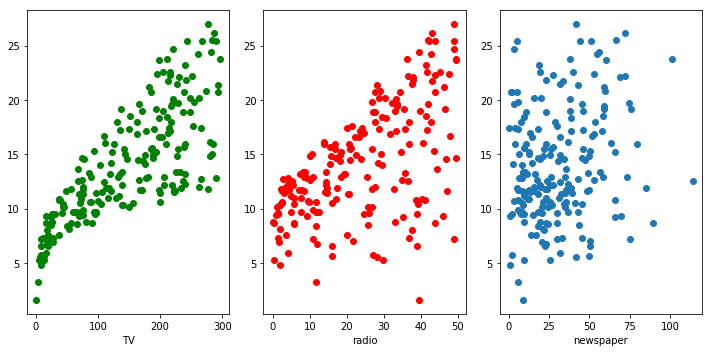

In [26]:
fig = plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
plt.scatter(x1, y, c='green')
plt.xlabel('TV')

plt.subplot(1,3,2)
plt.scatter(x2, y, c='red')
plt.xlabel('radio')

plt.subplot(1,3,3)
plt.scatter(x3, y)
plt.xlabel('newspaper')

plt.tight_layout()

plt.show()

In [48]:
# Perform Linear Regression
from sklearn.linear_model import LinearRegression

x1 = x1.values.reshape(-1, 1)
linmod = LinearRegression()
linmod.fit(x1,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

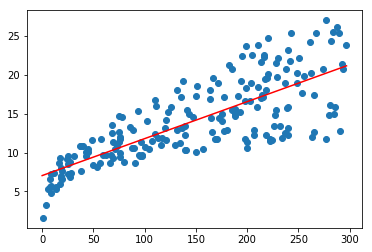

In [54]:
import numpy as np
import math
xval = np.linspace(math.floor(x1.min()), math.ceil(x1.max()), 100)
yval = linmod.intercept_ + linmod.coef_ * xval
plt.scatter(x1,y)
plt.plot(xval, yval, color='red')
plt.show()

In [46]:
x1.max()

296.4

In [28]:
print(linmod.coef_)

[0.04753664]


In [29]:
print(linmod.intercept_)

7.032593549127693


In [30]:
# Perform Linear Regression using statsmodel
import statsmodels.api as sm

x1 = sm.add_constant(x1)
linmod2 = sm.OLS(y, x1).fit()

linmod2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 14 Aug 2019   Prob (F-statistic):           1.47e-42
Time:                        16:40:47   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
x1             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
# Perform Multiple Linear Regression using statsmodel
import statsmodels.api as sm

#Extract the three features: TV, radio and newspaper
x = adsdata.iloc[0:,0:3]

x = sm.add_constant(x)
linmod3 = sm.OLS(y, x).fit()

linmod3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 14 Aug 2019   Prob (F-statistic):           1.58e-96
Time:                        16:41:00   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

ValueError: x and y must be the same size

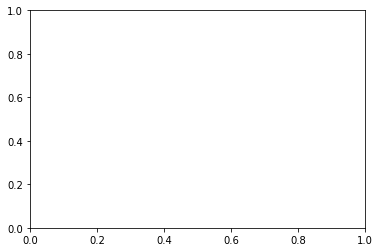

In [32]:
plt.scatter(x1, y)